# Hello Google Collab

Notes:
- Colab sessions expire after 12 hours
- Limited computing resources
- Files are temporary unless saved to Google Drive
- Run cells in order


## Some Keyboard shortcuts

| Command | Description |
|---------|-------------|
| `Ctrl/Cmd + m` | Initiate command |
| `Ctrl/Cmd + m b` | Insert `code` cell below |
| `Ctrl/Cmd + m a` | Insert `code` cell above |
| `Ctrl/Cmd + m d` | Delete selected cell |
| `Ctrl/Cmd + Enter` | **Run** selected cell |
| `Ctrl/Cmd + m y` | Convert to `code` cell |
| `Ctrl/Cmd + m m` | Convert to **markdown** cell |
| `Ctrl/Cmd + m z` | Undo last cell deletion |
| `Ctrl/Cmd + s` | Save notebook |
| `Ctrl/Cmd + f` | Find and replace |
| `Ctrl/Cmd + shift + H` | replace within cell |
| `Ctrl/Cmd + h` | replace within cell |
| `Tab` | Code completion |
| `Shift + Tab` | Show documentation |
| `Esc` | Enter command mode |
| `Enter` | Enter edit mode |

# Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Install nextflow
! pip install nextflow
! pip install scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for nextflow: filename=nextflow-24.10.3-py3-none-any.whl size=7929 sha256=0d1fa7a9ed06915f7643bf9d72d70db69437e6c6f8cc8586be7849d17d78fcc5
  Stored in directory: /root/.cache/pip/wheels/65/fe/31/ca76b02e5ad8ebaca7e90cbab5072b9a9349b4bdce59ecaf8c
Successfully built nextflow


Project Structure

```sh
penguin_analysis/
├── main.nf
├── nextflow.config
├── data/
│   └── penguins.csv
├── bin/
│   ├── data_cleaning.py
│   ├── species_analysis.py
│   └── visualization.py
└── results/
```

Setup directories

In [ ]:
%%bash
mkdir -p data
mkdir -p bin
mkdir -p results

In [ ]:
!wget https://raw.githubusercontent.com/PMBB-Informatics-and-Genomics/psb2025-workshop/refs/heads/main/penguin_analysis/data/penguins_size.csv -O data/penguins_size.csv
!wget https://raw.githubusercontent.com/PMBB-Informatics-and-Genomics/psb2025-workshop/refs/heads/main/penguin_analysis/bin/data_cleaning.py -O bin/data_cleaning.py
!wget https://raw.githubusercontent.com/PMBB-Informatics-and-Genomics/psb2025-workshop/refs/heads/main/penguin_analysis/bin/species_analysis.py -O bin/species_analysis.py

--2025-01-04 17:51:54--  https://raw.githubusercontent.com/PMBB-Informatics-and-Genomics/psb2025-workshop/refs/heads/main/penguin_analysis/data/penguins_size.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13515 (13K) [text/plain]
Saving to: ‘data/penguins_size.csv’

data/penguins_size. 100%[===================>]  13.20K  --.-KB/s    in 0s      

2025-01-04 17:51:54 (65.3 MB/s) - ‘data/penguins_size.csv’ saved [13515/13515]

--2025-01-04 17:51:54--  https://raw.githubusercontent.com/PMBB-Informatics-and-Genomics/psb2025-workshop/refs/heads/main/penguin_analysis/bin/data_cleaning.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

## Hello World

In [ ]:
%%writefile bin/hello_world.nf
#!/usr/bin/env nextflow

process say_hello {
    input:
        val(greeting)
    output:
        stdout
    shell:
        """
        echo "${greeting}, World!"
        """
}

workflow {
    greeting_list = ['Hello', 'Hola', 'Bonjour', 'Ciao']
    many_hellos = Channel.fromList(greeting_list)

    // greetings_stdout is another Channel!
    greetings_stdout = say_hello(many_hellos)
    greetings_stdout | view
}

In [ ]:
!nextflow run bin/hello_world.nf

# EDA (non nextflow)

In [ ]:
input_file = "data/penguins_size.csv"
df = pd.read_csv(input_file)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
#Check the statistics of numerical features
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
#Check the values of categorical features
# Identify categorical columns (e.g., dtype == 'object' or 'category')
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display unique values for each categorical column
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'species': ['Adelie' 'Chinstrap' 'Gentoo']
Unique values in 'island': ['Torgersen' 'Biscoe' 'Dream']
Unique values in 'sex': ['MALE' 'FEMALE' nan '.']


# Write channel with one item

Write the parameters
- data path
- data cleaning
- data analysis

Write Clean Data Process
- syntax for code:
```sh
python  ${cleaning_script} --input_file ${raw_input}
```

Species Analysis process
- syntax:
```sh
python ${analysis_script} --input_file ${cleaned_data} --species ${species}
```





In [ ]:
%%writefile bin/penguins.nf
#!/usr/bin/env nextflow

params.data = '/content/data/penguins_size.csv'
params.cleaning_script = '/content/bin/data_cleaning.py'
params.analysis_script = '/content/bin/species_analysis.py'

process clean_data {
    publishDir "${launchDir}/data/"
    input:
        path cleaning_script
        path raw_input

    output:
        path 'penguins_cleaned.csv'

    script:
    """
    python  ${cleaning_script} --input_file ${raw_input}
    """
}

process species_analysis {
    publishDir "${launchDir}/results/"
    input:
        val species
        path analysis_script
        path cleaned_data

    output:
        path "${species}_basic_stats.csv"
        path "${species}_correlations.png"
        path "${species}_dimorphism_stats.csv"
        path "${species}_distributions.png"

    script:
        """
        python ${analysis_script} --input_file ${cleaned_data} --species ${species}
        """
}


workflow {
    // create a species channel
    species_channel = Channel.from('Adelie', 'Gentoo', 'Chinstrap')
    raw_data = "${params.data}"

    // clean the data
    cleaning_script = "${params.cleaning_script}"
    cleaned_data = clean_data(cleaning_script, raw_data)

    // run the analysis
    analysis_script = "${params.analysis_script}"
    species_analysis(species_channel, analysis_script, cleaned_data)
}

Overwriting bin/penguins.nf


Run the script!

In [ ]:
! nextflow run bin/penguins.nf


 N E X T F L O W   ~  version 24.10.3

Launching `bin/penguins.nf` [awesome_hamilton] DSL2 - revision: d0785fee2b

[-        ] clean_data -

[-        ] clean_data       -
[-        ] species_analysis -

[-        ] clean_data       | 0 of 1
[-        ] species_analysis -

executor >  local (1)
[0f/a329a7] clean_data       | 0 of 1
[-        ] species_analysis -

executor >  local (3)
[0f/a329a7] clean_data           | 1 of 1 ✔
[c2/fd6652] species_analysis (3) | 0 of 3

executor >  local (4)
[0f/a329a7] clean_data           | 1 of 1 ✔
[c2/fd6652] species_analysis (3) | 2 of 3

executor >  local (4)
[0f/a329a7] clean_data           | 1 of 1 ✔
[0f/998115] species_analysis (2) | 3 of 3 ✔



# Results

In [ ]:
species = 'Adelie'
# species = 'Gentoo'
# species = 'Chinstrap'

## Results: Stats

In [ ]:
input_file = f"results/{species}_basic_stats.csv"
stats = pd.read_csv(input_file)
stats.head()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,mean,-0.970490,0.610054,-0.773809,-0.615274
1,std,0.479023,0.582004,0.454215,0.583452
2,min,-1.850537,-0.661991,-1.710909,-1.698174
3,max,0.352248,2.032934,0.654178,0.737624


## Results: dimorphism

In [ ]:
# input_file = f"results/{species}_basic_stats.csv"
input_file = f"results/{species}_dimorphism_stats.csv"
dimporphism = pd.read_csv(input_file)
dimporphism.head()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,t_statistic,8.040733e+00,8.223772e+00,3.597711,1.204871e+01
1,p_value,4.462577e-13,1.631828e-13,0.000453,5.186088e-23
2,effect_size,1.396168e+00,1.422973e+00,0.626836,2.097947e+00


## Results: correlation

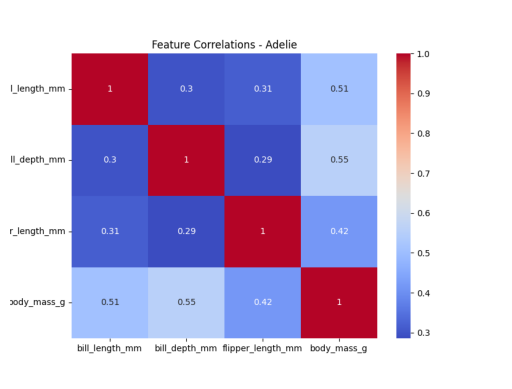

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

correlations = f"results/{species}_correlations.png"

img = mpimg.imread(correlations)
plt.imshow(img)
plt.axis('off')
plt.show()

## Results: distribution


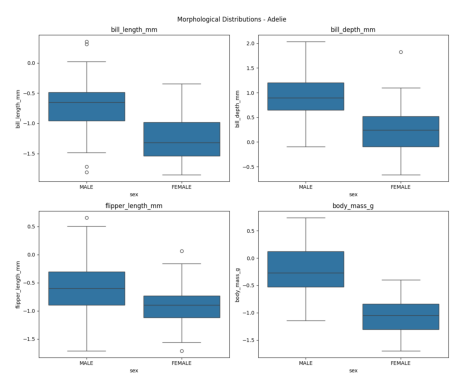

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# correlations = f"results/{species}_correlations.png"
distributions = f"results/{species}_distributions.png"

img = mpimg.imread(distributions)
plt.imshow(img)
plt.axis('off')
plt.show()